In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_pa = pd.read_csv('/Users/abhishektiwari/Desktop/sem2/CS506/code/ds-councilor-breadon-bad-landlords2/spring23-team-2/data/BostonAssessorsDataCleaned - BostonAssessorsDataCleaned.csv')
df_pa.head()

/var/folders/1b/_v8pf4v97tgfz6kktgdtr2300000gn/T/ipykernel_14177/3620112733.py:1: DtypeWarning: Columns (15,22,24,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pa = pd.read_csv('/Users/abhishektiwari/Desktop/sem2/CS506/code/ds-councilor-breadon-bad-landlords2/spring23-team-2/data/BostonAssessorsDataCleaned - BostonAssessorsDataCleaned.csv')


,Unnamed: 0,PROP_ID,LOC_ID,BLDG_VAL,LAND_VAL,OTHER_VAL,TOTAL_VAL,FY,LOT_SIZE,LS_DATE,...,AssessedYear,acreage,StandardizedUseCodes,StandardizedUseDesc,NonResidentialUses,UseDesc,residentialunits,unitsource,DUA,Developable
0,1,100213000,F_783144_2964233,0,0,0,0,2020,0.0,19920928.0,...,2020.0,0.228752,102,Condominium,"Tax-exempt, public, charitable, institutional","Residential Condominium, Other, Open Space",4.0,MHP estimate,17.486216,NaN
1,5,100218000,F_783205_2964264,437000,291800,0,728800,2020,0.0,19990202.0,...,2020.0,0.077937,105,Three-family,NaN,Three-Family Residential,4.0,MHP estimate,51.323242,NaN
2,6,100219000,F_783236_2964275,472900,267300,0,740200,2020,0.0,20161109.0,...,2020.0,0.064641,105,Three-family,NaN,Three-Family Residential,4.0,MHP estimate,61.879834,NaN
3,7,100220000,F_783269_2964282,408300,244900,0,653200,2020,0.0,19870101.0,...,2020.0,0.054759,105,Three-family,NaN,Three-Family Residential,4.0,MHP estimate,73.046991,NaN
4,8,100221000,F_783294_2964292,198800,125100,0,323900,2020,0.0,20171006.0,...,2020.0,0.026261,101,Single-family,NaN,Single Family Residential,3.0,MHP estimate,114.236512,NaN


In [4]:
df_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98691 entries, 0 to 98690
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            98691 non-null  int64  
 1   PROP_ID               98691 non-null  int64  
 2   LOC_ID                98690 non-null  object 
 3   BLDG_VAL              98691 non-null  int64  
 4   LAND_VAL              98691 non-null  int64  
 5   OTHER_VAL             98691 non-null  int64  
 6   TOTAL_VAL             98691 non-null  int64  
 7   FY                    98691 non-null  int64  
 8   LOT_SIZE              98691 non-null  float64
 9   LS_DATE               98690 non-null  float64
 10  LS_PRICE              98691 non-null  int64  
 11  USE_CODE              98691 non-null  int64  
 12  SITE_ADDR             98691 non-null  object 
 13  ADDR_NUM              89302 non-null  object 
 14  FULL_STR              98691 non-null  object 
 15  LOCATION           

In [5]:
df_pa.isnull().sum()

Unnamed: 0                  0
PROP_ID                     0
LOC_ID                      1
BLDG_VAL                    0
LAND_VAL                    0
OTHER_VAL                   0
TOTAL_VAL                   0
FY                          0
LOT_SIZE                    0
LS_DATE                     1
LS_PRICE                    0
USE_CODE                    0
SITE_ADDR                   0
ADDR_NUM                 9389
FULL_STR                    0
LOCATION                96203
CITY                        0
ZIP                         1
OWNER1                      0
OWN_ADDR                   14
OWN_CITY                    1
OWN_STATE                  75
OWN_ZIP                    17
OWN_CO                  97986
LS_BOOK                   392
LS_PAGE                   448
REG_ID                  98691
ZONING                  98691
YEAR_BUILT                  0
BLD_AREA                    0
UNITS                       0
RES_AREA                    0
STYLE                    5700
STORIES   

In [6]:
#drop columns with more than 50% null values
for col in df_pa.columns:
    if df_pa[col].isnull().sum() > 0.5*len(df_pa):
        df_pa.drop(col, axis=1, inplace=True)

df_pa.isnull().sum()



Unnamed: 0                  0
PROP_ID                     0
LOC_ID                      1
BLDG_VAL                    0
LAND_VAL                    0
OTHER_VAL                   0
TOTAL_VAL                   0
FY                          0
LOT_SIZE                    0
LS_DATE                     1
LS_PRICE                    0
USE_CODE                    0
SITE_ADDR                   0
ADDR_NUM                 9389
FULL_STR                    0
CITY                        0
ZIP                         1
OWNER1                      0
OWN_ADDR                   14
OWN_CITY                    1
OWN_STATE                  75
OWN_ZIP                    17
LS_BOOK                   392
LS_PAGE                   448
YEAR_BUILT                  0
BLD_AREA                    0
UNITS                       0
RES_AREA                    0
STYLE                    5700
STORIES                 14201
NUM_ROOMS                   0
LOT_UNITS                   0
CAMA_ID                     0
TOWN_ID   

<AxesSubplot: >

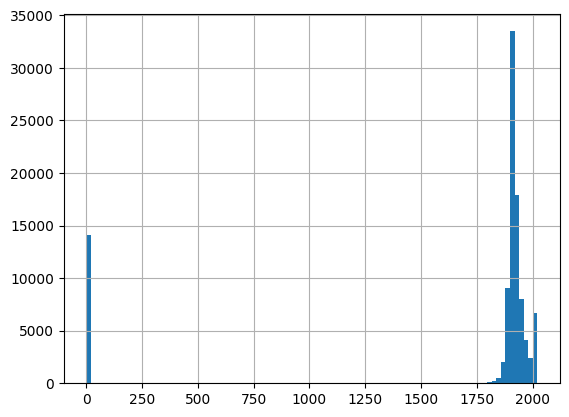

In [14]:
#print the distrubution of year built
df_pa['YEAR_BUILT'].value_counts()
#plot the histogram of year built, every 20 years
df_pa['YEAR_BUILT'].hist(bins=100)

<AxesSubplot: >

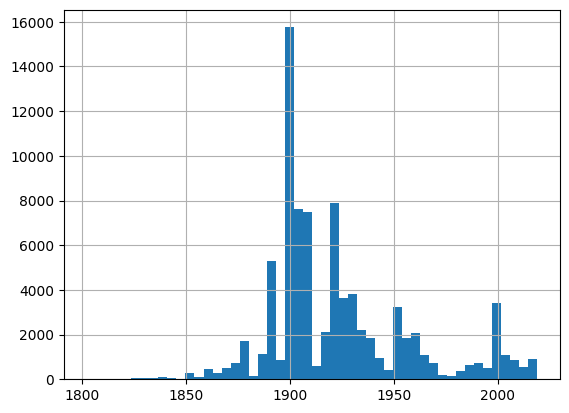

In [18]:
#Remove rows that were built before 1800
df_pa = df_pa[df_pa['YEAR_BUILT'] > 1800]
df_pa['YEAR_BUILT'].hist(bins=50)